# SVM

The core idea of SVM is to create a hyperplane that has the best margin — meaning it creates high confidence in classification while keeping the decision boundary wide enough to separate two classes (hard margin). In a more specific case, it also allows some misclassifications to handle outliers or noise in the data, which is known as a soft margin.

The first step is to form the decision boundary, which is the equation of a hyperplane: wᵀx + b, where w is the weight vector (∈ ℝⁿ) and b is the bias (∈ ℝ). The parameters w and b are obtained through convex optimization, typically involving quadratic programming.

The optimization considers both functional margin and geometrical margin. The functional margin is defined as yᵢ(wᵀx + b), where yᵢ ∈ {−1, +1} represents the class label. This value reflects the confidence of prediction, but it is scale-dependent, meaning it changes with the magnitude of w, so it is not reliable on its own.

To address this, we use the geometrical margin, defined as yᵢ(wᵀx + b)/||w||, which normalizes by the norm of w, making it scale-invariant and more meaningful for optimization.

The goal of the SVM is to maximize the geometrical margin, which is equivalent to minimizing ||w||. This is typically done by minimizing (1/2)||w||², a form that is easier to handle mathematically, subject to the constraint yᵢ(wᵀx + b) ≥ 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import generate_graph, generate_random_data

In [2]:
df = generate_random_data.get_svm_data(500)
def get_outliers(height_class: str, df_specific: pd.DataFrame) -> int:
    if height_class == "Too short": return len(df_specific[~(df_specific["Height (cm)"] < 320)])
    elif height_class == "Too tall": return len(df_specific[~(df_specific["Height (cm)"] > 570)])
    return len(df_specific[~(df_specific["Height (cm)"] >= 320) | ~(df_specific["Height (cm)"] <= 570)])
summary = df.groupby("Class")["Height (cm)"].agg(["mean", "size"]).reset_index()
summary["Outliers"] = summary["Class"].apply(lambda height_class: get_outliers(height_class, df[df["Class"] == height_class]))
summary

,Class,mean,size,Outliers
0,Ideal,161.710062,223,223
1,Too short,132.861978,136,0
2,Too tall,191.789553,141,141


In [3]:
df["Class"] = df["Class"].map({"Too tall": -1, "Too short": -1, "Ideal": 1})

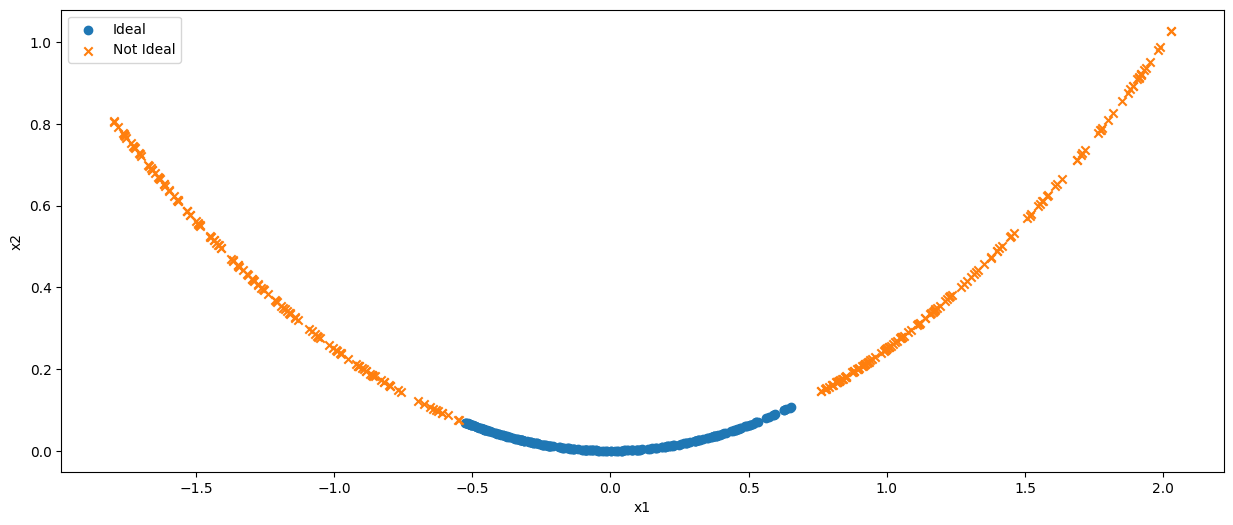

In [4]:
df["Normalized Height (cm)"] = (df["Height (cm)"] - df["Height (cm)"].mean()) / df["Height (cm)"].std()
df["Transformed X"] = (df["Normalized Height (cm)"] / 2) ** 2
generate_graph.show_svm_data(df)

In [5]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
X = df[["Normalized Height (cm)", "Transformed X"]].values
y = df["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sklearn_model = LinearSVC()
sklearn_model.fit(X_train, y_train)
y_predict = sklearn_model.predict(X_test)
sum(y_predict == y_test) / len(y_test)

np.float64(1.0)

In [6]:
w = sklearn_model.coef_[0]
b = sklearn_model.intercept_[0]
# generate_graph.show_svm_data(df, w, b)
y_predict = []
for Xi in X_test:
    result = w.reshape(1, -1) @ Xi.T + b
    y_predict.append(1 if result > 0 else -1)
sum(y_predict == y_test) / len(y_test)

np.float64(1.0)

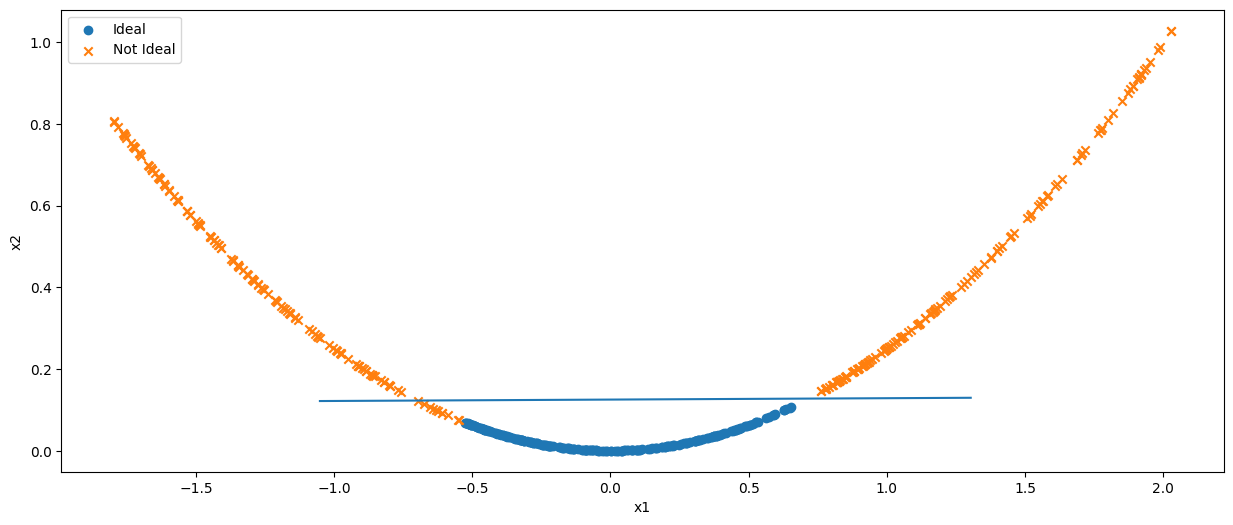

In [7]:
generate_graph.show_svm_data(df, w, b)